In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path
from matplotlib.colors import Normalize
from matplotlib import cm

In [3]:
directory = 'Datasets/crcns/hc2/ec013.527'

#### Load spike times

In [4]:
times = np.fromfile(os.path.join(directory,'ec013.527.res.3'), dtype=np.int, sep='\r')
cluster = np.fromfile(os.path.join(directory,'ec013.527.clu.3'), dtype=np.int8, sep='\r')[:-1]

In [5]:
units = [times[cluster == i] for i in range(2,cluster.max())]

In [6]:
[(n, u.size) for n,u in enumerate(units)]

[(0, 223),
 (1, 403),
 (2, 8426),
 (3, 32434),
 (4, 767),
 (5, 14),
 (6, 172),
 (7, 760),
 (8, 24),
 (9, 895),
 (10, 793)]

#### Load open field data

In [7]:
led_path = np.loadtxt(os.path.join(directory,'ec013.527.whl'))
led_times = np.arange(led_path.shape[0])*(1./39.06 * 20000/1.) # Units of 1/20000 sec
led_path = np.concatenate([led_path[:,:2], led_times[:,np.newaxis]], axis=1)
led_path = np.ma.masked_equal(led_path, -1)
led_path = np.ma.compress_rows(led_path)

#### Plot trajectory of mouse

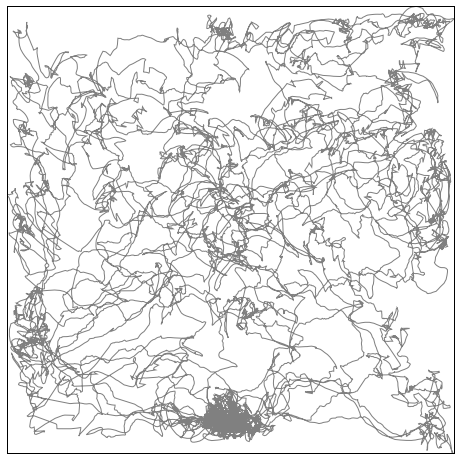

In [8]:
verts = np.ma.compress_rows(led_path)[:,:2]
codes = [Path.MOVETO] + [Path.LINETO]*(verts.shape[0]-1)
path = Path(verts, codes)

f = plt.figure(figsize=(8,8))
ax = f.add_subplot(111)
patch = patches.PathPatch(path, facecolor='none', edgecolor='grey', lw=1)
ax.add_patch(patch)
ax.set_xlim(verts[:,0].min(),verts[:,0].max());
ax.set_ylim(verts[:,1].min(),verts[:,1].max());
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

#### Plot place field for selected neurons

In [9]:
start_t, stop_t = led_path[0,-1], led_path[-1,-1]
valid_units = [u[np.logical_and(u > start_t, u < stop_t)] for u in units]
interp_xy = interp1d(x=led_path[:,-1], y=verts[:,:], axis=0)

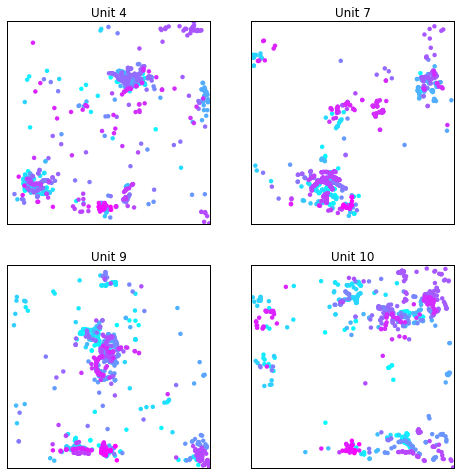

In [11]:
idxs = [4,7,9,10]
f2, ax2 = plt.subplots(2, 2, figsize=(8,8), )
for ax,i in zip(ax2.flatten(),idxs):
    coords = interp_xy(valid_units[i])
    ax.scatter(x=coords[:,0], y=coords[:,1], c=valid_units[i], cmap='cool', linewidths=0);
    ax.set_xlim(verts[:,0].min(),verts[:,0].max());
    ax.set_ylim(verts[:,1].min(),verts[:,1].max());
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title('Unit %d'%i)